In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# 8x8 pixel per image -> 64 features !!! Humans are not able to cope with this
# This is why we use PCA -> reduce the dimensions: we can visualize the data in 2D.
# We want to investigate if the distribution after PCA reveals the
# distribution of the different classes, and if they are clearly separable

In [3]:
digits = load_digits()
X_digits, y_digits = digits.data, digits.target

print(digits.images.shape)

(1797, 8, 8)


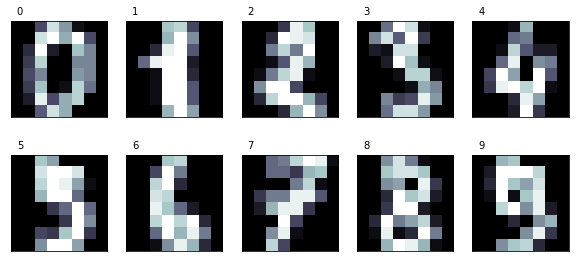

In [4]:
n_row, n_col, max_n = 2, 5, 10

fig = plt.figure(figsize = (2. * n_col, 2.26 * n_row))
i = 0

while i < max_n and i < digits.images.shape[0]:
    p = fig.add_subplot(n_row, n_col, i + 1, xticks=[],
    yticks=[])
    p.imshow(digits.images[i], cmap=plt.cm.bone, interpolation='nearest')
    # label the image with the target value
    p.text(0, -1, str(digits.target[i]))
    i = i + 1

In [5]:
estimator = PCA(n_components=10)
X_pca = estimator.fit_transform(X_digits)

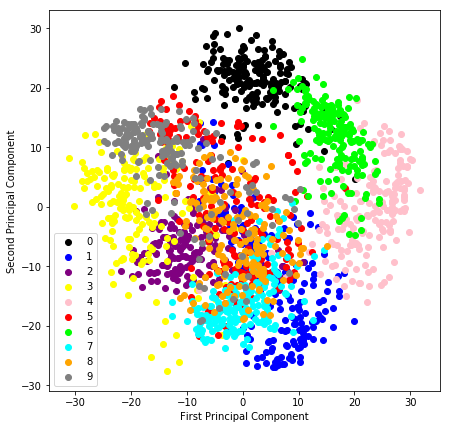

In [6]:
colors = ['black', 'blue', 'purple', 'yellow', 'pink','red', 'lime', 'cyan', 'orange', 'gray']

plt.figure(figsize = (7,7))

for i in range(len(colors)):
    px = X_pca[:, 0][y_digits == i]
    py = X_pca[:, 1][y_digits == i]
    plt.scatter(px, py, c=colors[i])
    plt.legend(digits.target_names)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')